In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("vivino.db")
cursor = conn.cursor()


#### Question 1: Which 10 wines would you lik eto increase sales

##### Most expensive wines

In [2]:
# We want to highlight 10 wines to increase our sales. Which ones should we choose and why?
# FOR VINTAGE WINES: HIGH PRIC
cursor.execute('''SELECT DISTINCT vintages.name, vintages.ratings_average, vintages.ratings_count, vintages.price_euros 
               FROM vintages 
               WHERE vintages.ratings_count > 500
               ORDER BY  vintages.price_euros DESC, vintages.ratings_average DESC,vintages.ratings_count DESC
               LIMIT 10;''')
data = cursor.fetchall()
cols = ['vintage_name', 'rating_average', 'rating_count', 'price_vintage']
df1 = pd.DataFrame(data, columns=cols)
df1['revenue_vintages'] = df1['rating_count'] * df1['price_vintage']
df1

,vintage_name,rating_average,rating_count,price_vintage,revenue_vintages
0,Pétrus Pomerol 1982,4.7,1361,9180.00,12493980.00
1,Pétrus Pomerol 1990,4.8,1190,6300.00,7497000.00
2,Château Lafite Rothschild Pauillac (Premier Gr...,4.7,1273,5977.50,7609357.50
3,Masseto Toscana 2001,4.8,651,5231.25,3405543.75
4,Masseto Toscana 2006,4.8,797,4910.00,3913270.00
5,Masseto Toscana 2005,4.8,762,4697.50,3579495.00
6,Masseto Toscana 2010,4.7,1054,4697.50,4951165.00
7,Pétrus Pomerol 1979,4.7,883,4410.00,3894030.00
8,Masseto Toscana 2004,4.7,767,4163.75,3193596.25
9,Masseto Toscana 2008,4.7,764,4163.75,3181105.00


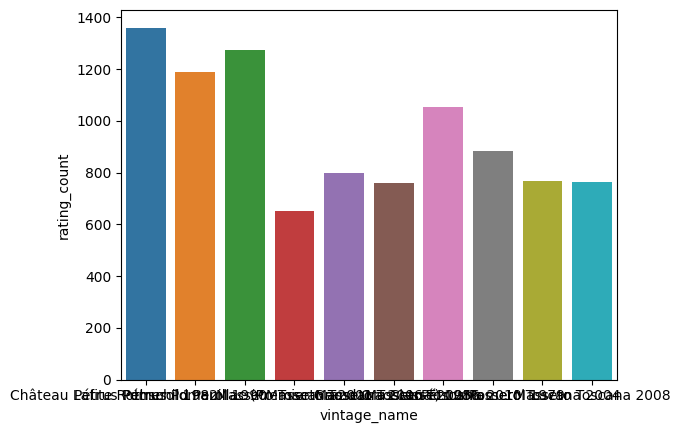

In [22]:
import seaborn as sns
fig = sns.barplot(data=df1, x='vintage_name', y='rating_count')


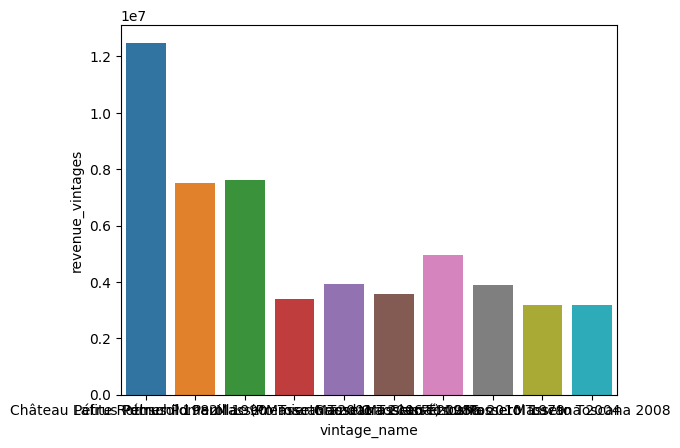

In [21]:
import seaborn as sns
fig = sns.barplot(data=df1, x='vintage_name', y='revenue_vintages')

##### Most purchased wines based on ratings_count

In [16]:
cursor.execute('''SELECT DISTINCT vintages.name, vintages.ratings_average, vintages.ratings_count, vintages.price_euros 
               FROM vintages 
               WHERE vintages.ratings_count > 500
               ORDER BY vintages.ratings_count DESC, vintages.ratings_average DESC
               LIMIT 10;''')
data = cursor.fetchall()
cols = ['vintage_name', 'rating_average', 'rating_count', 'price_vintage']
df2 = pd.DataFrame(data, columns=cols)
df2['revenue_vintages'] = df2['rating_count'] * df2['price_vintage']
df2

,vintage_name,rating_average,rating_count,price_vintage,revenue_vintages
0,Laurent-Perrier Brut Cuvée Champagne Rosé,4.4,36681,72.00,2641032.00
1,Krug Grande Cuvée,4.6,28513,245.00,6985685.00
2,Billecart-Salmon Brut Rosé Champagne,4.4,23241,81.50,1894141.50
3,Ruinart Brut Rosé Champagne,4.4,21147,49.61,1049102.67
4,Dom Pérignon Brut Champagne 2006,4.6,21121,440.00,9293240.00
5,San Marzano 60 Sessantanni Old Vines Primitivo...,4.5,17090,63.95,1092905.50
6,Opus One Overture,4.5,16804,180.00,3024720.00
7,Caymus Cabernet Sauvignon 2019,4.6,15647,177.95,2784383.65
8,Dom Pérignon Brut Champagne 2004,4.6,14650,460.00,6739000.00
9,Antinori Tignanello 2016,4.6,13709,420.00,5757780.00


##### Answer: These vintages give us the most Revenue for highly rated wines

In [4]:
merged_df = pd.concat([df1,df2]) 
sorted_df = merged_df.sort_values(by='revenue_vintages', ascending=False)
sorted_df.head(10)

,vintage_name,rating_average,rating_count,price_vintage,revenue_vintages
0,Pétrus Pomerol 1982,4.7,1361,9180.0,12493980.0
4,Dom Pérignon Brut Champagne 2006,4.6,21121,440.0,9293240.0
2,Château Lafite Rothschild Pauillac (Premier Gr...,4.7,1273,5977.5,7609357.5
1,Pétrus Pomerol 1990,4.8,1190,6300.0,7497000.0
1,Krug Grande Cuvée,4.6,28513,245.0,6985685.0
8,Dom Pérignon Brut Champagne 2004,4.6,14650,460.0,6739000.0
9,Antinori Tignanello 2016,4.6,13709,420.0,5757780.0
6,Masseto Toscana 2010,4.7,1054,4697.5,4951165.0
4,Masseto Toscana 2006,4.8,797,4910.0,3913270.0
7,Pétrus Pomerol 1979,4.7,883,4410.0,3894030.0


In [10]:
import pandas as pd
import pygwalker as pyg

walker = pyg.walk(sorted_df)

Box(children=(HTML(value='<div id="ifr-pyg-2" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

#### Question 2: What country should we focus on?

##### Answer: FOCUS ON FRANCE:given the highest revnue per country

In [5]:
cursor.execute('''SELECT DISTINCT countries.name, vintages.name, vintages.ratings_average, vintages.ratings_count, vintages.price_euros 
               FROM wines
               JOIN vintages ON wine_id == wines.id
               JOIN regions ON region_id == regions.id
               JOIN countries ON regions.country_code == countries.code 
               WHERE vintages.ratings_count > 500
               ORDER BY  vintages.price_euros DESC, vintages.ratings_average DESC,vintages.ratings_count DESC
               LIMIT 10;''')
data = cursor.fetchall()
cols = ['country', 'vintage_name', 'rating_average', 'rating_count', 'price_vintage']
df3 = pd.DataFrame(data, columns=cols)
df3['revenue_vintages'] = df3['rating_count'] * df3['price_vintage']
df3

,country,vintage_name,rating_average,rating_count,price_vintage,revenue_vintages
0,France,Pétrus Pomerol 1982,4.7,1361,9180.00,12493980.00
1,France,Pétrus Pomerol 1990,4.8,1190,6300.00,7497000.00
2,France,Château Lafite Rothschild Pauillac (Premier Gr...,4.7,1273,5977.50,7609357.50
3,Italie,Masseto Toscana 2001,4.8,651,5231.25,3405543.75
4,Italie,Masseto Toscana 2006,4.8,797,4910.00,3913270.00
5,Italie,Masseto Toscana 2005,4.8,762,4697.50,3579495.00
6,Italie,Masseto Toscana 2010,4.7,1054,4697.50,4951165.00
7,France,Pétrus Pomerol 1979,4.7,883,4410.00,3894030.00
8,Italie,Masseto Toscana 2004,4.7,767,4163.75,3193596.25
9,Italie,Masseto Toscana 2008,4.7,764,4163.75,3181105.00


[Text(0, 0, 'Pétrus Pomerol 1982'),
 Text(1, 0, 'Pétrus Pomerol 1990'),
 Text(2, 0, 'Château Lafite Rothschild Pauillac (Premier Grand Cru Classé) 1986'),
 Text(3, 0, 'Masseto Toscana 2001'),
 Text(4, 0, 'Masseto Toscana 2006'),
 Text(5, 0, 'Masseto Toscana 2005'),
 Text(6, 0, 'Masseto Toscana 2010'),
 Text(7, 0, 'Pétrus Pomerol 1979'),
 Text(8, 0, 'Masseto Toscana 2004'),
 Text(9, 0, 'Masseto Toscana 2008')]

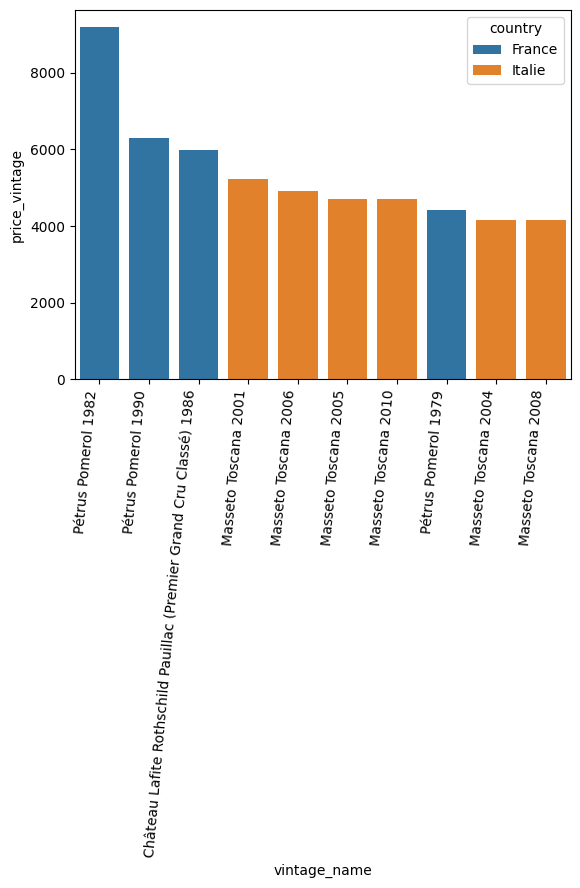

In [37]:
ax = sns.barplot(data=df3, x='vintage_name', y='price_vintage', hue='country', dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=85, ha='right')  # ha='right' aligns labels to the right


In [23]:
walker = pyg.walk(df3)

Box(children=(HTML(value='<div id="ifr-pyg-3" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

#### Question 3: specific combination of tastes

In [6]:
test = '''  
SELECT 
    wines.name,
    vintages.name,
    vintages.ratings_average,
    vintages.ratings_count,
    GROUP_CONCAT(DISTINCT keywords.name) AS mixed_tastes,
    keywords_wine.group_name
FROM 
    vintage_toplists_rankings
JOIN 
    vintages ON vintage_toplists_rankings.vintage_id = vintages.id
JOIN 
    wines ON vintages.wine_id = wines.id
JOIN 
    regions ON wines.region_id = regions.id
JOIN 
    countries ON regions.country_code = countries.code
JOIN 
    keywords_wine ON wines.id = keywords_wine.wine_id
JOIN 
    keywords ON keywords_wine.keyword_id = keywords.id
WHERE 
    keywords.name IN ('coffee', 'toast', 'green apple', 'cream', 'citrus')
AND 
    keywords_wine.count > 9
GROUP BY 
    vintages.name
HAVING 
    COUNT(DISTINCT keywords.name) >= 2
ORDER BY vintages.ratings_count DESC, vintages.ratings_average DESC, mixed_tastes DESC, price_euros DESC;
'''
cursor.execute(test)
data = cursor.fetchall()

columns = ['wine_name', 'vintage_name', 'ratings_average', 'ratings_count', 'mixed_tastes', 'taste_group']
df_3 = pd.DataFrame(data, columns=columns)
# pd.set_option('display.max_rows', None)
df_3


,wine_name,vintage_name,ratings_average,ratings_count,mixed_tastes,taste_group
0,Brut Cuvée Champagne Rosé,Laurent-Perrier Brut Cuvée Champagne Rosé,4.4,36681,"citrus,cream,green apple,toast",citrus_fruit
1,Grande Cuvée,Krug Grande Cuvée,4.6,28513,"citrus,coffee,cream,green apple,toast",citrus_fruit
2,Brut Rosé Champagne,Billecart-Salmon Brut Rosé Champagne,4.4,23241,"citrus,cream,green apple,toast",citrus_fruit
3,60 Sessantanni Old Vines Primitivo di Manduria,San Marzano 60 Sessantanni Old Vines Primitivo...,4.5,17090,"coffee,cream,toast",non_oak
4,Tignanello,Antinori Tignanello 2016,4.6,13709,"citrus,coffee,cream,toast",citrus_fruit
...,...,...,...,...,...,...
73,Clos Sainte Hune Riesling Alsace,Trimbach Clos Sainte Hune Riesling Alsace 2012,4.5,271,"citrus,cream,green apple",citrus_fruit
74,Nine Popes,Charles Melton Nine Popes 2015,4.4,260,"coffee,toast",non_oak
75,Baron de L Pouilly-Fumé,de Ladoucette Baron de L Pouilly-Fumé 2019,4.4,252,"citrus,cream,green apple",citrus_fruit
76,Ribera del Duero,Alión Ribera del Duero 2019,4.5,199,"coffee,cream,toast",non_oak


In [7]:
import pandas as pd
import pygwalker as pyg

walker = pyg.walk(df_3)

#### Question 4: 
- Find the top 3 most common grape all over the world and for each grape
- give us the 5 best rated wines.

In [3]:
# TOP 3 MOST COMMON GRAPES
cursor.execute( """SELECT most_used_grapes_per_country.grape_id, grapes.name, most_used_grapes_per_country.wines_count, COUNT(most_used_grapes_per_country.grape_id) AS grapeCount
             FROM most_used_grapes_per_country
             JOIN grapes ON most_used_grapes_per_country.grape_id = grapes.id
             GROUP BY grape_id
             ORDER BY grapeCount DESC, wines_count DESC
             LIMIT 5
             """ )

cursor.fetchall() 

[(2, 'Cabernet Sauvignon', 801751, 12),
 (10, 'Merlot', 566719, 11),
 (5, 'Chardonnay', 604208, 6),
 (14, 'Pinot Noir', 572334, 3),
 (1, 'Shiraz/Syrah', 551112, 3)]

In [4]:
# TOP 5 BEST RATED CABERNET SAUVIGNON
cursor.execute( """SELECT wines.name, wines.ratings_average, countries.name, grapes.name
            FROM wines
            JOIN regions ON wines.region_id = regions.id
            JOIN countries ON regions.country_code = countries.code
            JOIN grapes ON most_used_grapes_per_country.grape_id = grapes.id
            JOIN most_used_grapes_per_country ON countries.code = most_used_grapes_per_country.country_code
            WHERE grapes.id IN (2)
            ORDER BY wines.ratings_average DESC
            LIMIT 5
            """)
cursor.fetchall()

[('Cabernet Sauvignon', 4.8, 'États-Unis', 'Cabernet Sauvignon'),
 ('Mágico', 4.8, 'Espagne', 'Cabernet Sauvignon'),
 ('IX Estate Red', 4.7, 'États-Unis', 'Cabernet Sauvignon'),
 ('Special Selection Cabernet Sauvignon',
  4.7,
  'États-Unis',
  'Cabernet Sauvignon'),
 ('Unico Reserva Especial Edición', 4.7, 'Espagne', 'Cabernet Sauvignon')]

In [ ]:
# TOP 5 BEST RATED MERLOT
cursor.execute( """SELECT wines.name, wines.ratings_average, countries.name, grapes.name
            FROM wines
            JOIN regions ON wines.region_id = regions.id
            JOIN countries ON regions.country_code = countries.code
            JOIN grapes ON most_used_grapes_per_country.grape_id = grapes.id
            JOIN most_used_grapes_per_country ON countries.code = most_used_grapes_per_country.country_code
            WHERE grapes.id IN (10)
            ORDER BY wines.ratings_average DESC
            LIMIT 5
            """)
cursor.fetchall() 

In [5]:
# TOP 5 BEST RATED CHARDONNAY
cursor.execute( """SELECT wines.name, wines.ratings_average, countries.name, grapes.name
            FROM wines
            JOIN regions ON wines.region_id = regions.id
            JOIN countries ON regions.country_code = countries.code
            JOIN grapes ON most_used_grapes_per_country.grape_id = grapes.id
            JOIN most_used_grapes_per_country ON countries.code = most_used_grapes_per_country.country_code
            WHERE grapes.id IN (5)
            ORDER BY wines.ratings_average DESC
            LIMIT 5
            """)

cursor.fetchall() 

[('Amarone della Valpolicella Classico Riserva', 4.8, 'Italie', 'Chardonnay'),
 ('Cabernet Sauvignon', 4.8, 'États-Unis', 'Chardonnay'),
 ('Fratini Bolgheri Superiore', 4.8, 'Italie', 'Chardonnay'),
 ('Cristal Rosé Vinothèque', 4.8, 'France', 'Chardonnay'),
 ('Batard-Montrachet Grand Cru', 4.8, 'France', 'Chardonnay')]

#### Question 5: We would to give create a country leaderboard, give us a visual that shows the average wine rating for each country. Do the same for the vintages.

In [6]:
cursor.execute( """
SELECT 
    countries.name, 
    ROUND(AVG( vintages.ratings_average),2) AS average_rating_vintage,
    ROUND(AVG(wines.ratings_average),2) AS average_rating_wine
    
FROM 
    vintages
    JOIN wines ON vintages.wine_id = wines.id
    JOIN regions ON wines.region_id = regions.id
    JOIN countries ON regions.country_code = countries.code

GROUP BY countries.name
ORDER BY average_rating_vintage DESC, average_rating_wine DESC;


    """)
data = cursor.fetchall()
cols = ['countries', 'rating_average_vintage','rating_average_wine']
df_1 = pd.DataFrame(data, columns=cols)
df_1

,countries,rating_average_vintage,rating_average_wine
0,Roumanie,4.50,4.40
1,Croatie,4.40,4.30
2,Argentine,4.32,4.43
3,Chili,4.12,4.47
4,Portugal,3.93,4.43
5,Moldavie,3.87,4.47
6,États-Unis,3.70,4.51
7,Afrique du Sud,3.66,4.47
8,Italie,3.63,4.48
9,Espagne,3.38,4.47
